In [37]:
#  Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

___
Enter Team Member Names here (*double click to edit*):

- Name 1: Jiwen Zhou
- Name 2: Zhi Yang
- Name 3: Yang Sun
- Name 4: Huangfu Tong
___

# In Class Assignment Two
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (or HTML of the rendered notebook)  before the end of class (or right after class). The initial portion of this notebook is given before class and the remainder is given during class. Please answer the initial questions before class, to the best of your ability. Once class has started you may rework your answers as a team for the initial part of the assignment. 

<a id="top"></a>
## Contents
* <a href="#Loading">Loading the Data</a>
* <a href="#svm">Linear SVMs</a>
* <a href="#svm_using">Using Linear SVMs</a>
* <a href="#nonlinear">Non-linear SVMs</a>

________________________________________________________________________________________________________

<a id="Loading"></a>
<a href="#top">Back to Top</a>
## Loading the Data
Please run the following code to read in the "olivetti faces" dataset from sklearn's data loading module. 

This will load the data into the variable `ds`. `ds` is a `bunch` object with fields like `ds.data` and `ds.target`. The field `ds.data` is a numpy matrix of the continuous features in the dataset. **The object is not a pandas dataframe. It is a numpy matrix.** Each row is a set of observed instances, each column is a different feature. It also has a field called `ds.target` that is an integer value we are trying to predict (i.e., a specific integer represents a specific person). Each entry in `ds.target` is a label for each row of the `ds.data` matrix. 

In [38]:
# fetch the images for the dataset
# this will take a long time the first run because it needs to download
# after the first time, the dataset will be save to your disk (in sklearn package somewhere) 
# if this does not run, you may need additional libraries installed on your system (install at your own risk!!)
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=20, resize=None)

In [39]:
# get some of the specifics of the dataset
X = lfw_people.data
y = lfw_people.target
names = lfw_people.target_names

n_samples, n_features = X.shape
_, h, w = lfw_people.images.shape
n_classes = len(names)

print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("n_classes: {}".format(n_classes))
print("Original Image Sizes {} by {}".format(h,w))
print (125*94) # the size of the images are the size of the feature vectors

n_samples: 3023
n_features: 11750
n_classes: 62
Original Image Sizes 125 by 94
11750


**Question 1:** For the faces dataset, describe what the data represents? That is, what is each column? What is each row? What do the unique class values represent?


This data represents ...

Each row represents each photo.

Each column represents each pixel of each photo.

Each unique class value means each person.

So that the size of image is equal with the length of each row.
___

<a id="svm"></a>
<a href="#top">Back to Top</a>
## Linear Support Vector Machines

**Question 2:** If we were to train a linear Support Vector Machine (SVM) upon the faces data, how many parameters would need to be optimized in the model? That is, how many coefficients would need to be calculated?


728562
___

In [40]:
# Enter any scratchwork or calculations here
(11750+1)*62

728562

**Question 3:** 
- **Part A:** Given the number of parameters calculated above, would you expect the model to train quickly using **batch optimization techniques**? Why or why not? 
- **Part B:** Is there a way to reduce training time?
- **Part C:** If we transformed the X data using principle components analysis (PCA) with 100 components, how many parameters would we need to find for a linear Support Vector Machine (SVM)?


A. NO, 11751 elements to be calculated each class.

B. Yes, choose subset of instances or Dimension Reduce.

C. 6262
___

In [41]:
# Enter any scratchwork or calculations here

print('Part C. With 100 features: ', 6262)
101*62

Part C. With 100 features:  6262


6262

___
<a id="svm_using"></a>
<a href="#top">Back to Top</a>

# Using Linear SVMs

**Exercise 1:** Use the block of code below to check if the number of parameters you calculated is equal to the number of parameters returned by `sklearn`'s implementation of the Linear SVM. **Was your calculation correct? If different, can you think of a reason why the parameters would not match?**

In [42]:
from sklearn.svm import LinearSVC
from sklearn.decomposition import RandomizedPCA

n_components = 100
pca = RandomizedPCA(n_components=n_components)
Xpca = pca.fit_transform(X)

clf = LinearSVC()
clf.fit(Xpca,y)

/Users/zhoujiwen/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [43]:
#===================================================================
# Enter your code below to calculate the number of parameters in the model 
print(clf.get_params)
print(clf.coef_.shape)
print(clf.intercept_.shape)
#===================================================================

<bound method BaseEstimator.get_params of LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)>
(62, 100)
(62,)


___
**Exercise 2:** Use the starter code below to calculate two quantities: 
- **Part A.:** The overall accuracy of the trained linear svm on the training set
- **Part B.:** The *mean, standard deviation, maximum, and minimum* of the **accuracy per class** on the training set

You might be interested in the following documentation of the confusion matrix calculated by `scikit-learn`:
- http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

And an example matrix returned by the confusion matrix function:
<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_confusion_matrix_001.png",width=400,height=400>

Overall Accuracy is  0.879589811446
Confusion matrix, without normalization
Normalized confusion matrix


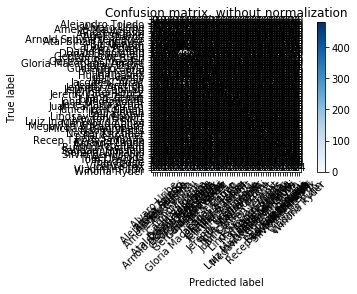

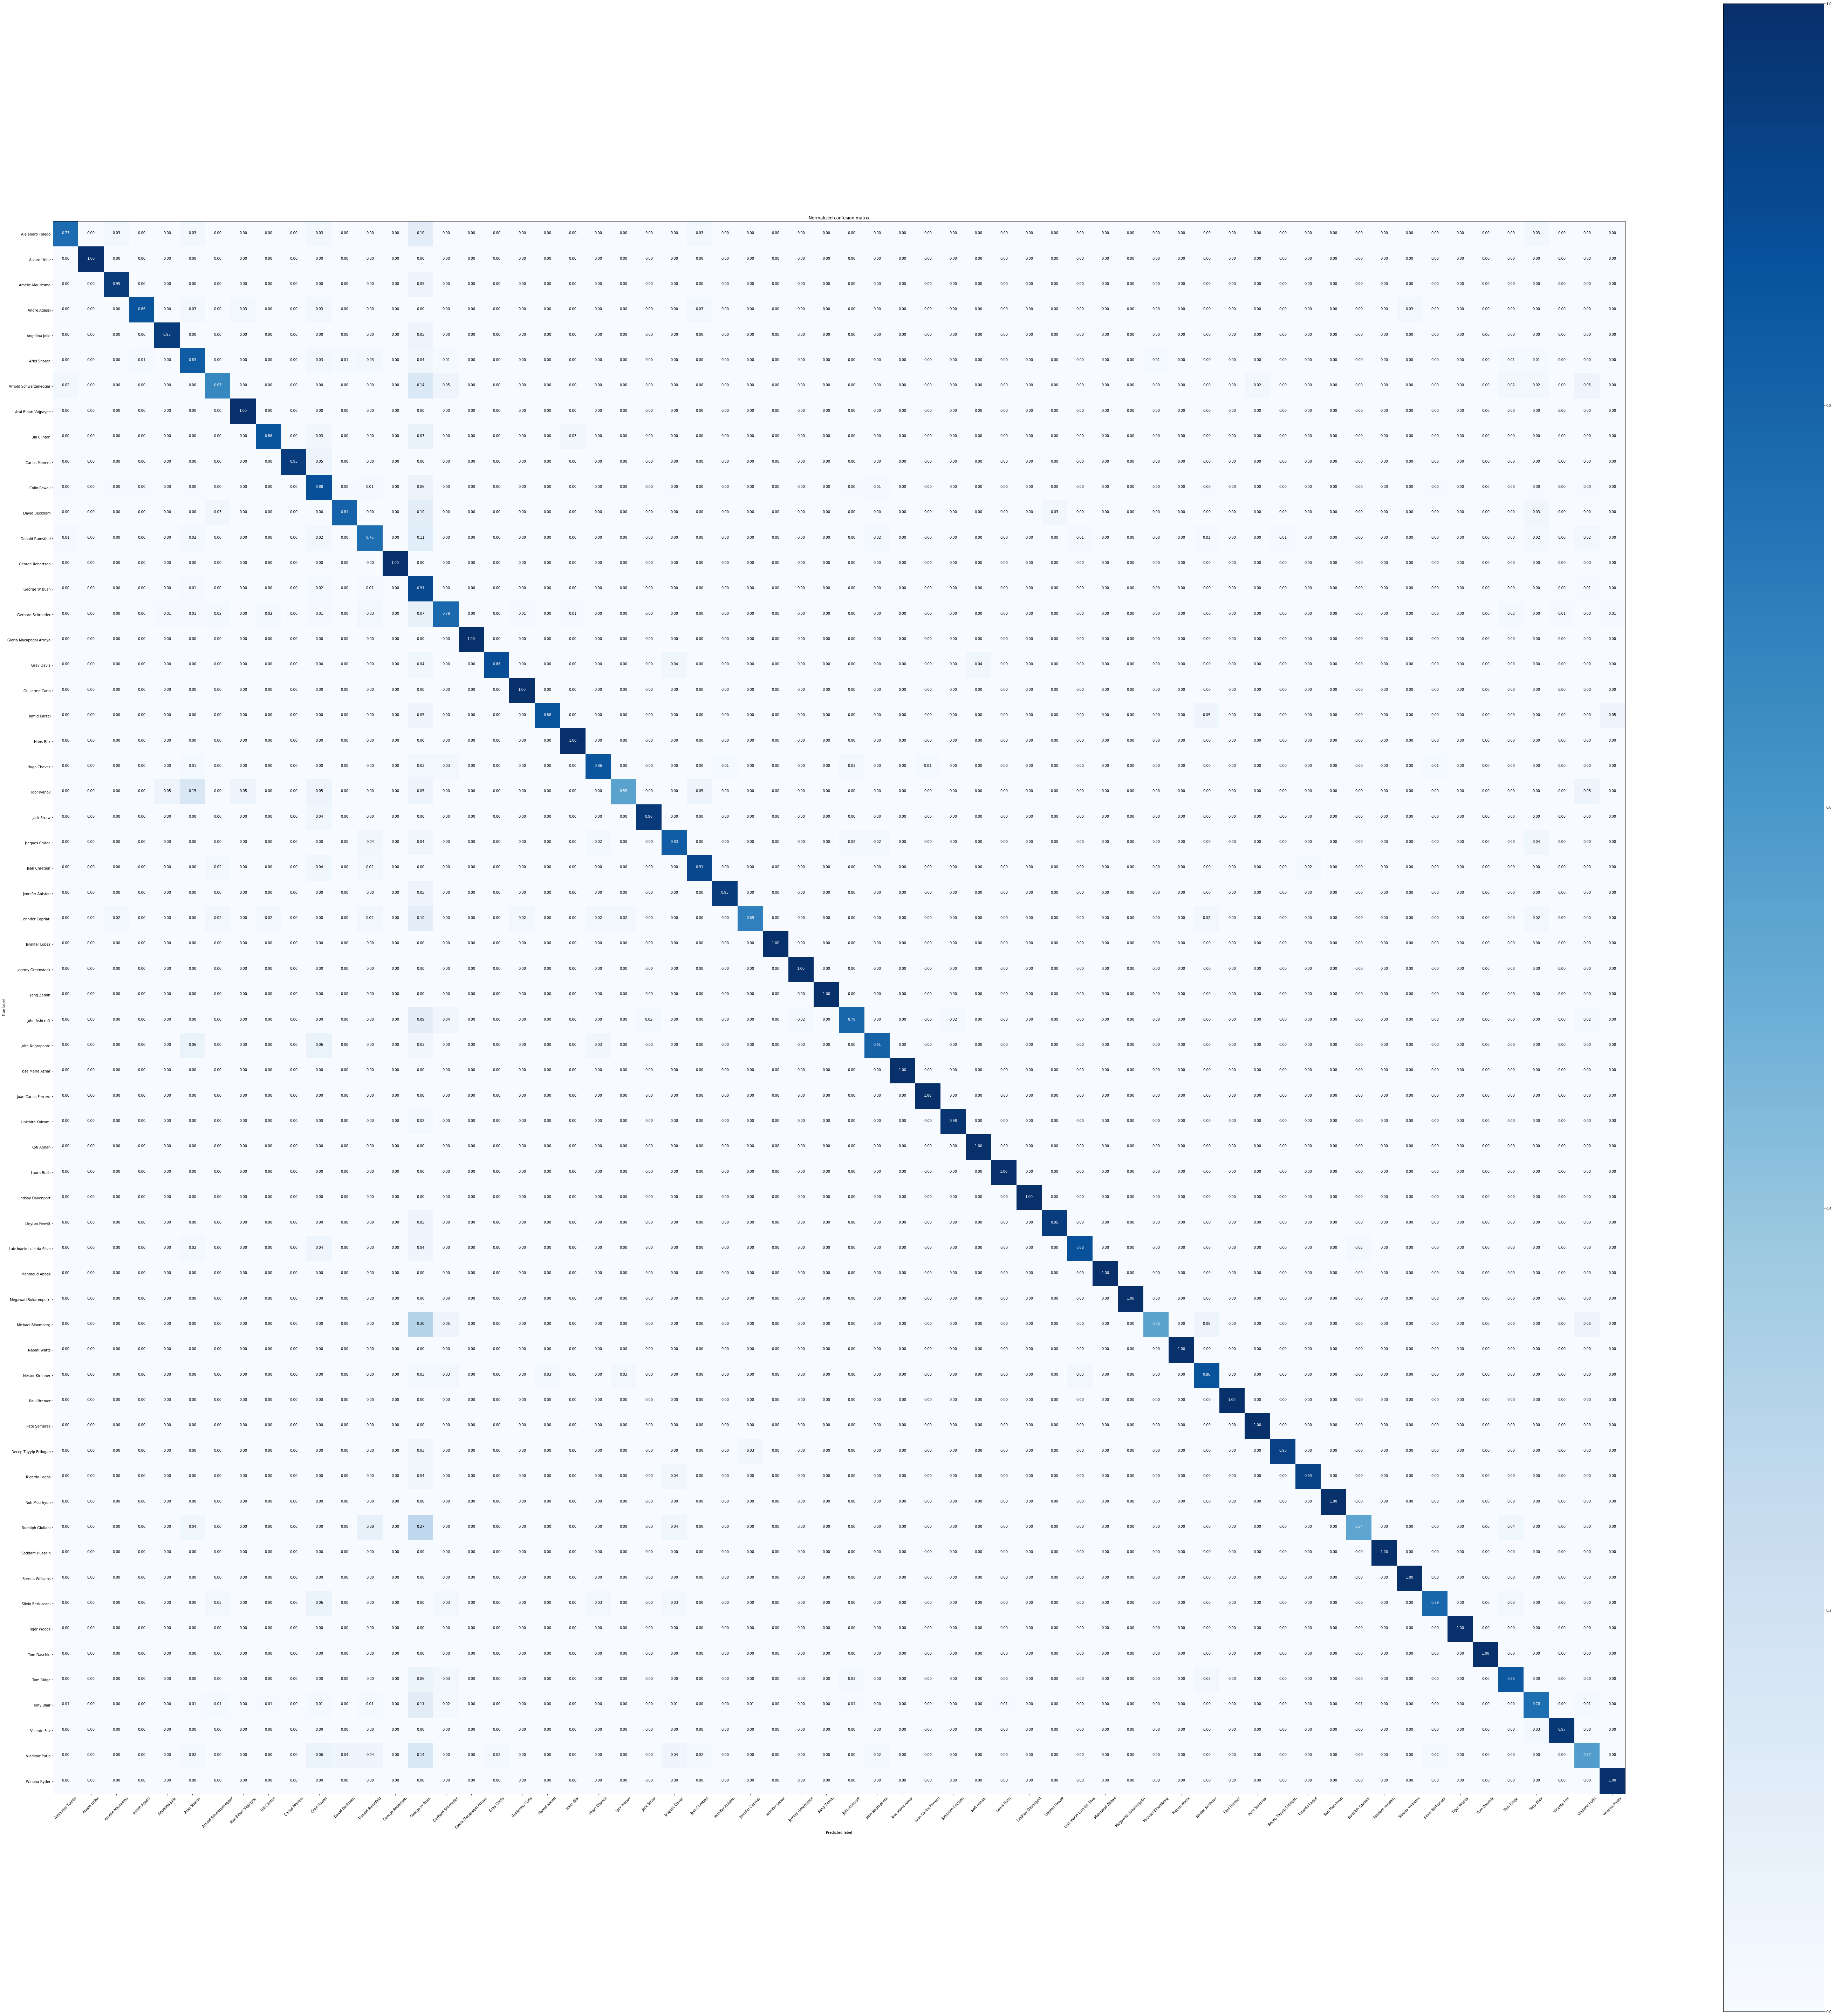

[ 0.77  1.    0.95  0.86  0.95  0.83  0.67  1.    0.86  0.95  0.88  0.81
  0.76  1.    0.91  0.78  1.    0.88  1.    0.86  1.    0.86  0.55  0.96
  0.83  0.91  0.95  0.69  1.    1.    1.    0.79  0.81  1.    1.    0.98
  1.    1.    1.    0.95  0.88  1.    1.    0.55  1.    0.86  1.    1.
  0.93  0.93  1.    0.54  1.    1.    0.79  1.    1.    0.85  0.76  0.97
  0.57  1.  ]

The mean 0.897318006252
The standard devation 0.126803049659

(min,max) ( 0.538461538462 1.0 )


In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import numpy as np

yhat = clf.predict(Xpca)

#===================================================
# Enter your code below

print('Overall Accuracy is ',accuracy_score(y, yhat))

class_names = names
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    return cm

# Compute confusion matrix
cnf_matrix = confusion_matrix(y, yhat)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(80,80))
cm = plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

diagcm = np.diag(cm)

print(diagcm)

print('\nThe mean', np.sum(diagcm)/len(diagcm))

print('The standard devation',np.std(diagcm))

print('\n(min,max) (',np.min(diagcm), np.max(diagcm),')')


___
<a id="nonlinear"></a>
<a href="#top">Back to Top</a>

# Non-linear SVMs
Now let's explore the use of non-linear svms. More explicitly, using different kernels. Take a look at the example training and testing code below for the non-linear SVM. All parameters are left as default, except we change the kernel to be `rbf`. Run the block of code below.



In [45]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf')
clf.fit(Xpca,y)
yhat = clf.predict(Xpca)
print('Overall Accuracy is ',accuracy_score(y,yhat))

Overall Accuracy is  0.937479325174


___
**Exercise 3:** Use the starter code from above to calculate the accuracy for three different non-linear SVM kernels. That is, repeat the code above for different `kernel` parameters. **Only use non-linear kernels.  Which kernel is most accurate with the default parameters?**

You might be interested in the documentation of the scikit-learn SVM implementation, available here:
- http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [46]:
#===================================================
# Enter your code below
from sklearn.svm import SVC

clf = SVC(kernel='sigmoid')
clf.fit(Xpca,y)
yhat = clf.predict(Xpca)
print('Overall Accuracy is ',accuracy_score(y,yhat))

clf = SVC(kernel='poly')
clf.fit(Xpca,y)
yhat = clf.predict(Xpca)
print('Overall Accuracy is ',accuracy_score(y,yhat))

# clf = SVC(kernel='precomputed')
# gram = np.dot(Xpca, Xpca.T)
# clf.fit(gram,y)

# yhat = clf.predict(gram)
# print('Overall Accuracy is ',accuracy_score(y,yhat))

#===================================================

Overall Accuracy is  0.212702613298
Overall Accuracy is  0.974859411181




The most accurate kernel is poly, 0.974859411181.


___
**Exercise 4:** Choose the **most accurate kernel** and manipulate the settings for `gamma` to make the classification more accurate. 
- **Part A:** How accurate can you make it? 
- **Part B:** Would you expect the results to generalize well? Why or why not?

In [47]:
#===================================================
# Enter your code below

kern = 'poly'
g = 0.05
c=SVC(kernel=kern, gamma=g).fit(Xpca,y)
yhat = c.predict(Xpca)
print('Overall Accuracy is ', accuracy_score(y,yhat)) 

#===================================================

Overall Accuracy is  1.0




A. The highest accuracy we could achieve was 1.0

B. We would not expect this to generalize because large gamma leads to high bias and low variance models, and vice-versa.



___
**Final Question:** Using the most accurate non-linear SVM you found in the previous question, how many parameter coefficients does the trained model contain?

For “one-vs-rest” LinearSVC the attributes coef_ and intercept_ have the shape [n_class, n_features] and [n_class] respectively. Each row of the coefficients corresponds to one of the n_class many “one-vs-rest” classifiers and similar for the intercepts, in the order of the “one” class.

In the case of “one-vs-one” SVC, the layout of the attributes is a little more involved. In the case of having a linear kernel, The layout of coef_ and intercept_ is similar to the one described for LinearSVC described above, except that the shape of coef_ is [n_class * (n_class - 1) / 2, n_features], corresponding to as many binary classifiers. The order for classes 0 to n is “0 vs 1”, “0 vs 2” , … “0 vs n”, “1 vs 2”, “1 vs 3”, “1 vs n”, . . . “n-1 vs n”.

The shape of dual_coef_ is [n_class-1, n_SV] with a somewhat hard to grasp layout. The columns correspond to the support vectors involved in any of the n_class * (n_class - 1) / 2 “one-vs-one” classifiers. Each of the support vectors is used in n_class - 1 classifiers. The n_class - 1 entries in each row correspond to the dual coefficients for these classifiers.



In [48]:
#===================================================
# Enter any scratchwork calculations you need below
print(c.dual_coef_.shape)
print(c.intercept_.shape)

(61, 2939)
(1891,)



________________________________________________________________________________________________________

That's all! Please **save (make sure you saved!!!) and upload your rendered notebook** and please include **team member names** in the notebook submission.